In [1]:
from sklearn.metrics import confusion_matrix
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

[7 4 1 ... 7 9 7]


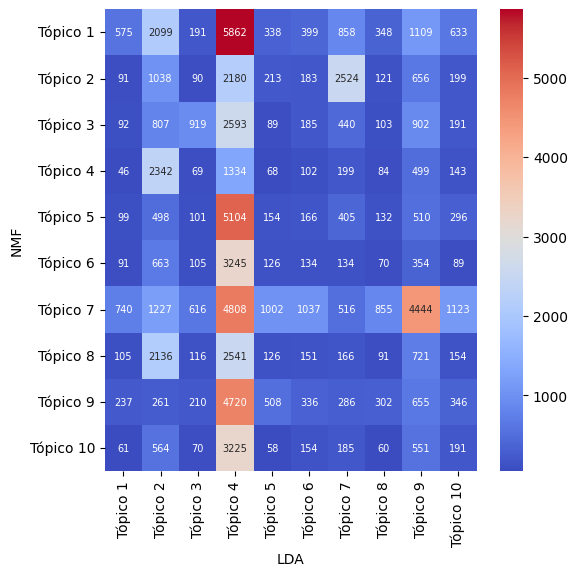

In [2]:
with open('model_serialization/x_nmf.pkl','rb') as file:
    x_nmf = pickle.load(file)
    
with open('model_serialization/x_lda.pkl','rb') as file:
    x_lda = pickle.load(file)
    
# Etiqueta más probable para cada algoritmo

nmf_labels_array = np.argmax(x_nmf,axis = 1)
nmf_labels = [x+1 for x in nmf_labels_array]
nmf_labels = np.array(nmf_labels)
print(nmf_labels)
lda_labels_array = np.argmax(x_lda,axis = 1)
lda_labels = [x+1 for x in lda_labels_array]
lda_labels = np.array(lda_labels)

#Creamos la matriz de confusión
cm = confusion_matrix(nmf_labels,lda_labels)

#Dibujar la matriz de confusión
topics = [f'Tópico {i}' for i in range(1, 11)]
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=topics, yticklabels=topics, annot_kws={"size": 7})
plt.xlabel('LDA')
plt.ylabel('NMF')

plt.savefig('image_topics/comparacion.png',  bbox_inches='tight')
plt.show()
